In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
graph_m = pd.read_csv("exec_times_medium.csv", index_col="workers")
graph_m

,split,map,shuffle,reduce,fetch
workers,,,,,
1,0.28,3.59,64.29,2.46,0.36
2,0.29,2.44,34.20,1.27,0.31
3,0.26,1.93,22.93,1.02,0.30
4,0.24,1.79,17.86,0.86,0.33
5,0.27,1.63,14.46,0.73,0.33
6,0.24,1.65,12.16,0.64,0.33
7,0.24,1.58,10.54,0.64,0.32
8,0.27,1.55,9.52,0.63,0.32
9,0.23,1.50,8.53,0.56,0.33


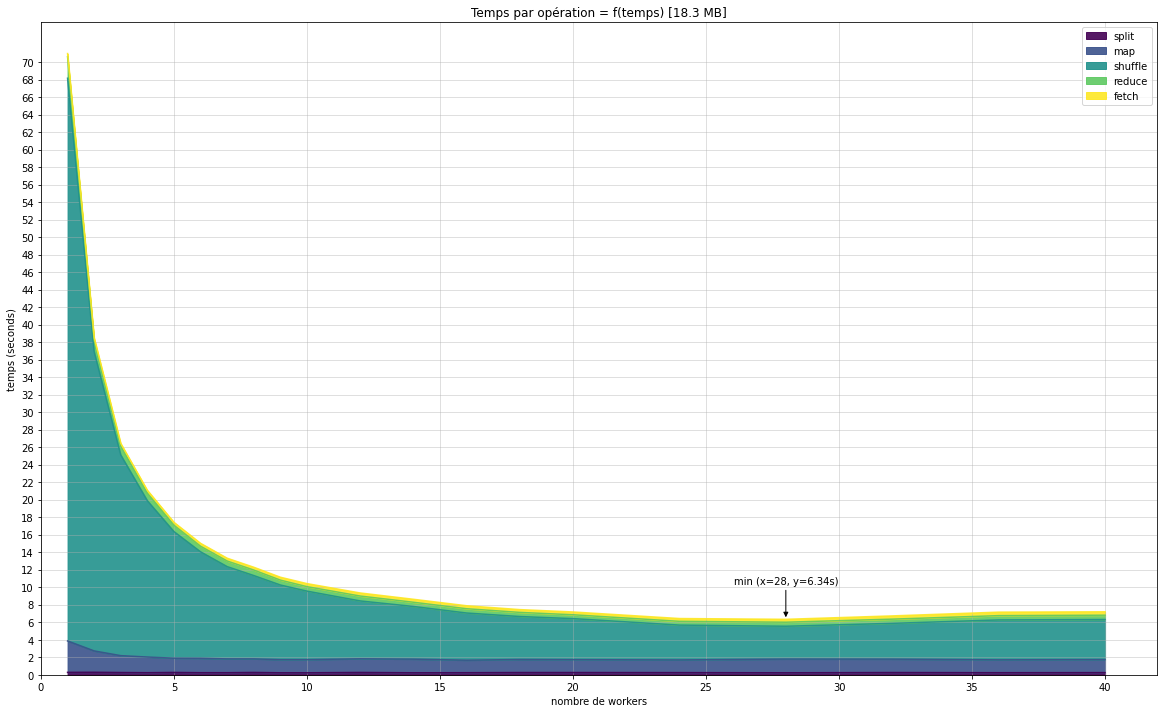

In [12]:
xmin = graph_m.sum(axis=1).idxmin()
ymin = graph_m.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)
graph_m.plot.area(colormap='viridis', alpha=0.9, ax=ax);

ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin), xytext=(xmin, ymin+4), ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})

ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 41, 5))
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 71, 2));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(temps) [18.3 MB]');
ax.legend();

plt.grid(visible=True, alpha=0.5);

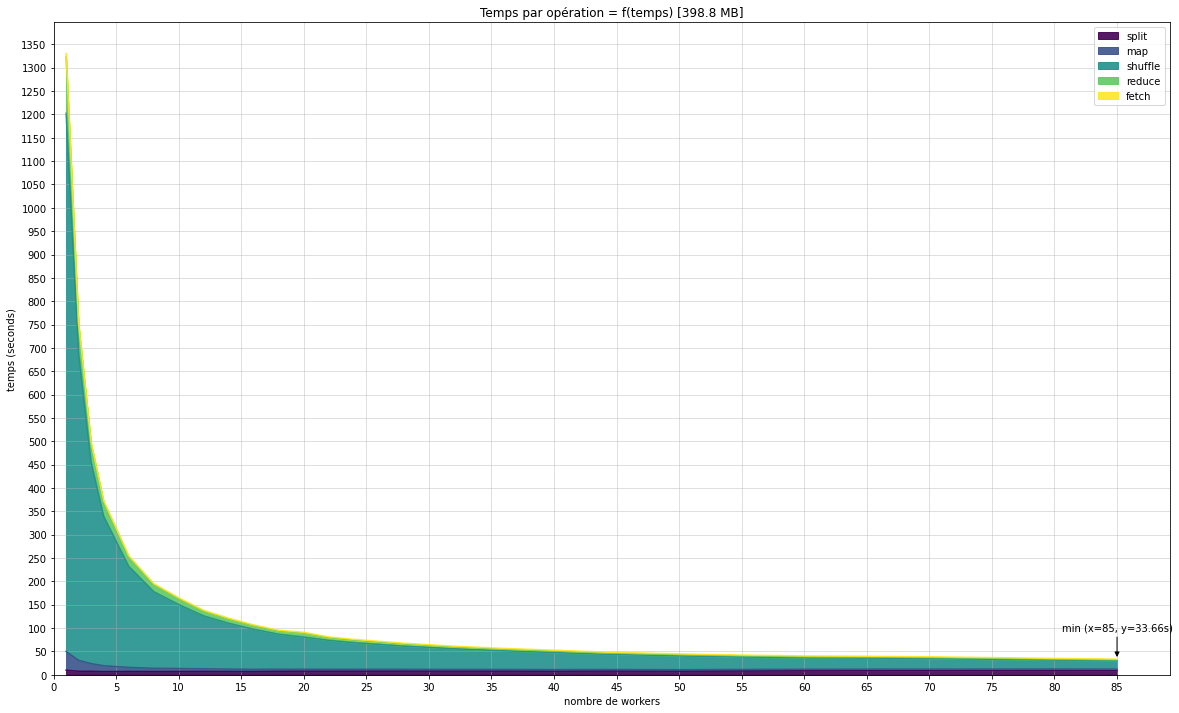

In [11]:
graph_l = pd.read_csv("exec_times_large.csv", index_col="workers")

xmin = graph_l.sum(axis=1).idxmin()
ymin = graph_l.loc[xmin,:].sum()

fig = plt.figure(figsize=(20, 12));
ax = fig.add_subplot(1, 1, 1)
graph_l.plot.area(colormap='viridis', alpha=0.9, ax=ax);
ax.annotate('min (x={}, y={:.2f}s)'.format(xmin, ymin), 
xy=(xmin, ymin),
xytext=(xmin, ymin+60),
ha='center',
arrowprops={'arrowstyle':'-|>','facecolor':'black'})
ax.set_xlabel('nombre de workers');
ax.set_xticks(np.arange(0, 86, 5));
ax.set_xlim(xmin=0)
ax.set_ylabel('temps (seconds)');
ax.set_yticks(np.arange(0, 1400, 50));
ax.set_ylim(ymin=0)
ax.set_title('Temps par opération = f(temps) [398.8 MB]');
ax.legend();

plt.grid(visible=True, alpha=0.5);